<a href="https://colab.research.google.com/github/abhinayvollala08/Quantum-Computing-Projects-for-Beginners/blob/main/Bell_States_using_PennyLane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bell States**

Bell states are four special 2-qubit quantum states that are maximally entangled.
This meands the two qubits behave as one combined system -  they cannot be described individually.

Bell states show perfect correlations or anti - correlations when measured.

They are the foundation of:

1. Quantum Teleportation
2. Superdence coding
3. Quantum Cryptography(QKD)
4. Quantum Networks
5. Entanglement Swapping

There are 4 Bell States:

1. $|\Phi^+ \rangle$ state
2. $|\Phi^- \rangle$ state
3. $|\Psi^+ \rangle$ state
4. $|\Psi^- \rangle$ state

**1. $|\Phi^+\rangle$ State**

$|\Phi^+\rangle$  = $|00\rangle + |11\rangle / \sqrt{2}$

**Meaning:**
- Both qubits are always the same
- either both are 0 or both are 1
- 50% chance of 00
- 50% chance of 11
- Never 01 or 10

Like two perfectly synced coins that always land the same way.


Implementation:
initialize 2 qubits
1. apply **Hadamard Gate(H)** to q0
2. apply **CNOT Gate** by taking q0 as Control and q1 as Target.


In [ ]:
!pip install pennylane

In [5]:
import pennylane as qml
from pennylane import numpy as np

0: ──H─╭●─┤  State
1: ────╰X─┤  State


array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

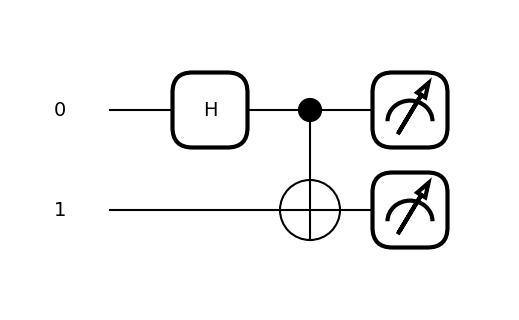

In [17]:
dev = qml.device("default.qubit", wires = 2)
@qml.qnode(dev)
def phi_plus():
  qml.H( wires = 0)
  qml.CNOT(wires = [0,1])
  return qml.state()


# ASCII Representation
drawer = qml.draw(phi_plus)
print(drawer())

# MPL Circuit diagram
qml.draw_mpl(phi_plus)()

# state
answer = phi_plus()
answer

**2. $|\Phi^-\rangle$ State**

$|\Phi^-\rangle$  = $|00\rangle - |11\rangle / \sqrt{2}$

**Meaning:**
- Also same values (00 or 11)
- But the state has a negative phase
- Still 50% 00 and 50% 11

Same as $|\Phi^+\rangle$ state, but with a hiddern minus sign

(doesn't change measurement results, but matters in quantum interference).


Implementation:
initialize 2 qubits
1. apply **Hadamard Gate(H)** to q0
2. apply **CNOT Gate** by taking q0 as Control and q1 as Target.
3. apply **PauliZ (Z) Gate** to q0.


array([ 0.70710678+0.j, -0.        +0.j,  0.        +0.j, -0.70710678+0.j])

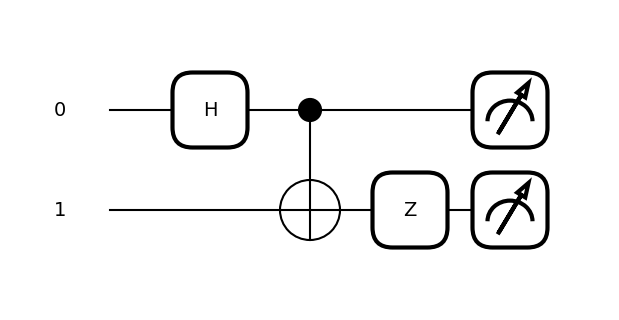

In [32]:
@qml.qnode(dev)
def phi_minus():
  qml.H(wires = 0)
  qml.CNOT(wires = [0,1])
  qml.Z(wires = 1)
  return qml.state()

qml.draw_mpl(phi_minus)()
state = phi_minus()
state

**3. $|\Psi^+\rangle$ State**

$|\Psi^+\rangle$  = $|01\rangle + |10\rangle / \sqrt{2}$

**Meaning:**
- The qubits are always opposite
- Either 01 or 10
- 50% Each
- NEVER 00 OR 11

If qubit A is 0 --> qubit B is 1

If qubit A is 1 --> qubit B is 0

Perfect anti - synchronization.


Implementation:
initialize 2 qubits
1. apply **Hadamard Gate(H)** to q0
2. apply **CNOT Gate** by taking q0 as Control and q1 as Target.
3. apply **PauliX (X) Gate** to q1.


array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

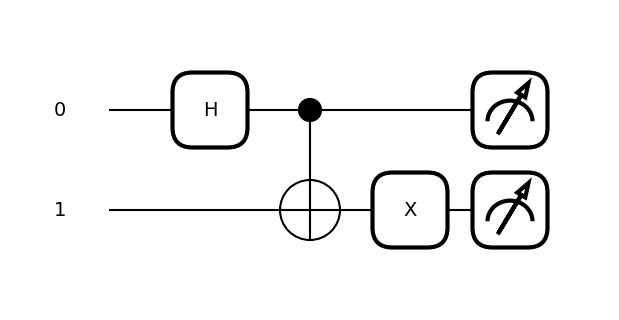

In [30]:
@qml.qnode(dev)
def psi_plus():
  qml.H(wires = 0)
  qml.CNOT(wires = [0,1])
  qml.X(wires = 1)
  return qml.state()

qml.draw_mpl(psi_plus)()

bell_psi_plus = psi_plus()
bell_psi_plus


**3. $|\Psi^-\rangle$ State**

$|\Psi^-\rangle$  = $|01\rangle - |10\rangle / \sqrt{2}$

**Meaning:**
- Also opposite outcoes
- Either 01 or 10
- 50% Each
- Has a minus sign(Phase difference)

**Why it's special:**

- This is the strongest entangled state

- Used in Bell inequality (CHSH) experiments

- Proves that quanum mechanics is non-classical

Like two coing that always disagree (One heads, one tails -  but you don't know which untill you look).


Implementation:
initialize 2 qubits
1. apply **Hadamard Gate(H)** to q0
2. apply **CNOT Gate** by taking q0 as Control and q1 as Target.
3. apply **PauliX (X) Gate** to q1.
4. apply **PauliZ (Z) Gate** to q0.


array([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j, -0.        +0.j])

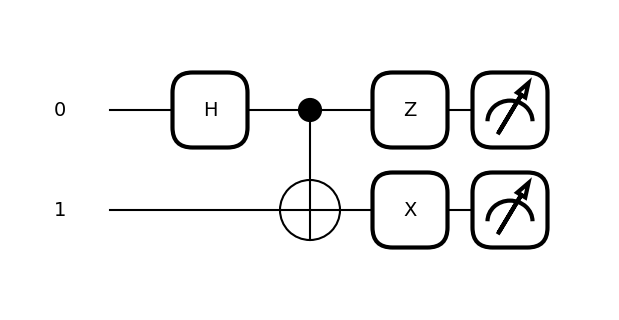

In [31]:
@qml.qnode(dev)
def psi_minus():
  qml.H(wires = 0)
  qml.CNOT(wires = [0,1])
  qml.X(wires = 1)
  qml.Z(wires = 0)
  return qml.state()

qml.draw_mpl(psi_minus)()
bell_psi_minus = psi_minus()
bell_psi_minus